In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Auto Quote Ins data

AutoIns = pd.read_csv(r"D:\00 Datasets\Ins\Auto_Quote_Data_V2.0.csv", header=0)

# Copy the data to backup file

AutoIns_BK = AutoIns.copy()

# Display first 5 records

AutoIns.head()

,Quote_Num,Agent_Type,Q_Creation_DT,Q_Valid_DT,Policy_Bind_DT,Region,Agent_Num,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range1,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range1,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
0,AQ-C-139212,EA,2020/04/25,2020/06/23,2020/05/23,C,2156,Car,3,3,43,26,0,0,Female,Widow,High School,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Balanced,Commute,> 55 K,> $ 10 K <= $ 20 K,> 10 K <= 20 K,No,693.86,Yes
1,AQ-F-136117,EA,2020/02/21,2020/04/20,NaN,F,2153,Van,2,2,30,13,0,0,Female,Dirvorced,Ph.D,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Balanced,Pleasure,> 7.5 K & <= 15 K,<= $ 10 K,<= 10 K,No,635.96,No
2,AQ-F-126801,EA,2020/06/19,2020/08/17,2020/07/12,F,2056,Truck,2,1,25,8,0,0,Female,Dirvorced,Ph.D,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Basic,Commute,> 35 K & <= 45 K,> $ 10 K <= $ 20 K,> 10 K <= 20 K,No,780.64,Yes
3,AQ-E-143467,EA,2020/05/02,2020/06/30,2020/05/24,E,2138,Car,1,2,43,26,0,0,Female,Married,Ph.D,> $ 90 K,> 90 K,Basic,Pleasure,<= 7.5 K,<= $ 10 K,<= 10 K,No,723.15,Yes
4,AQ-C-143827,EA,2020/02/12,2020/04/11,2020/02/25,C,2327,Truck,3,1,40,23,0,0,Female,Widow,High School,<= $ 25 K,<= 25 K,Basic,Pleasure,> 35 K & <= 45 K,<= $ 10 K,<= 10 K,No,738.14,Yes


In [3]:
# Display the Auto Insurance dataset information

AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Quote_Num           146259 non-null  object 
 1   Agent_Type          146259 non-null  object 
 2   Q_Creation_DT       146259 non-null  object 
 3   Q_Valid_DT          146259 non-null  object 
 4   Policy_Bind_DT      32502 non-null   object 
 5   Region              146259 non-null  object 
 6   Agent_Num           146259 non-null  int64  
 7   Policy_Type         146259 non-null  object 
 8   HH_Vehicles         146259 non-null  int64  
 9   HH_Drivers          146259 non-null  int64  
 10  Driver_Age          146259 non-null  int64  
 11  Driving_Exp         146259 non-null  int64  
 12  Prev_Accidents      146259 non-null  int64  
 13  Prev_Citations      146259 non-null  int64  
 14  Gender              146259 non-null  object 
 15  Marital_Status      146259 non-nul

In [4]:
# Convert the target variable data type into interger

AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].str.replace('Yes', '1')
AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].str.replace('No', '0')
AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].astype(int)
AutoIns.sample(10)

,Quote_Num,Agent_Type,Q_Creation_DT,Q_Valid_DT,Policy_Bind_DT,Region,Agent_Num,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range1,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range1,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
121180,AQ-B-143088,EA,2020/07/17,2020/09/14,NaN,B,2144,Van,1,3,29,12,0,0,Male,Dirvorced,Masters,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Basic,Pleasure,> 35 K & <= 45 K,> $ 20 K <= $ 30 K,> 20 K <= 30 K,No,645.93,0
43931,AQ-A-141789,EA,2020/05/28,2020/07/26,2020/06/01,A,2276,Car,2,2,29,12,0,0,Male,Widow,Masters,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Basic,Pleasure,> 45 K & <= 55 K,<= $ 10 K,<= 10 K,No,752.62,1
84264,AQ-D-127166,EA,2020/09/30,2020/11/28,NaN,D,2307,Car,1,1,46,29,0,0,Male,Widow,Bachelors,<= $ 25 K,<= 25 K,Enhanced,Business,<= 7.5 K,> $ 30 K <= $ 40 K,> 30 K <= 40 K,No,767.27,0
14899,AQ-G-128899,IA,2020/04/18,2020/06/16,NaN,G,2218,Car,2,3,25,8,0,0,Female,Widow,Ph.D,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Basic,Pleasure,> 7.5 K & <= 15 K,<= $ 10 K,<= 10 K,No,786.40,0
95182,AQ-B-140394,EA,2020/06/07,2020/08/05,2020/07/07,B,2231,Truck,3,1,59,42,0,0,Male,Married,Bachelors,<= $ 25 K,<= 25 K,Basic,Pleasure,> 25 K & <= 35 K,> $ 20 K <= $ 30 K,> 20 K <= 30 K,No,693.90,1
39286,AQ-C-125611,IA,2019/11/29,2020/01/27,NaN,C,2032,Van,2,1,61,44,0,1,Male,Single,Ph.D,<= $ 25 K,<= 25 K,Enhanced,Commute,> 7.5 K & <= 15 K,> $ 30 K <= $ 40 K,> 30 K <= 40 K,No,641.37,0
81243,AQ-A-138415,IA,2019/12/13,2020/02/10,NaN,A,2218,Truck,2,1,57,40,0,1,Male,Single,Bachelors,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Balanced,Commute,> 55 K,> $ 20 K <= $ 30 K,> 20 K <= 30 K,No,729.41,0
85008,AQ-F-144038,EA,2020/06/11,2020/08/09,NaN,F,2298,Van,1,9,28,11,0,0,Male,Widow,Masters,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Basic,Commute,> 7.5 K & <= 15 K,> $ 20 K <= $ 30 K,> 20 K <= 30 K,No,695.14,0
135076,AQ-F-127661,IA,2020/06/26,2020/08/24,NaN,F,2312,Car,1,2,21,4,0,0,Male,Widow,Bachelors,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Enhanced,Pleasure,> 35 K & <= 45 K,> $ 10 K <= $ 20 K,> 10 K <= 20 K,No,835.56,0
124700,AQ-B-131713,EA,2020/05/07,2020/07/05,2020/05/30,B,2172,Car,3,9,41,24,1,0,Female,Widow,Ph.D,<= $ 25 K,<= 25 K,Balanced,Commute,> 15 K & <= 25 K,> $ 30 K <= $ 40 K,> 30 K <= 40 K,No,866.66,1


In [5]:
# Count the target or independent variable by '0' & '1' and 
# their proportion (> 9 : 1, then the dataset is imbalance dataset)

Policy_Bind_count = AutoIns.Policy_Bind.value_counts()
print('Class 0:', Policy_Bind_count[0])
print('Class 1:', Policy_Bind_count[1])
print('Proportion:', round(Policy_Bind_count[0] / Policy_Bind_count[1], 2), ': 1')
print('Total Records:', len(AutoIns))

Class 0: 113757
Class 1: 32502
Proportion: 3.5 : 1
Total Records: 146259


In [6]:
# Displaying Duplicate values with in Loan ataset, if avialble

AutoIns_dup = AutoIns[AutoIns.duplicated(keep='last')]
AutoIns_dup

,Quote_Num,Agent_Type,Q_Creation_DT,Q_Valid_DT,Policy_Bind_DT,Region,Agent_Num,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range1,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range1,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind


In [7]:
# Count the missing values by each variable, if available

AutoIns.isnull().sum()

Quote_Num                  0
Agent_Type                 0
Q_Creation_DT              0
Q_Valid_DT                 0
Policy_Bind_DT        113757
Region                     0
Agent_Num                  0
Policy_Type                0
HH_Vehicles                0
HH_Drivers                 0
Driver_Age                 0
Driving_Exp                0
Prev_Accidents             0
Prev_Citations             0
Gender                     0
Marital_Status             0
Education                  0
Sal_Range1                 0
Sal_Range2                 0
Coverage                   0
Veh_Usage                  0
Annual_Miles_Range         0
Vehicl_Cost_Range1         0
Vehicl_Cost_Range2         0
Re_Quote                   0
Quoted_Premium             0
Policy_Bind                0
dtype: int64

In [8]:
# Dropping the variables which are impacting the target variable

AutoIns = AutoIns.drop(['Quote_Num', 'Agent_Num', 'Q_Creation_DT', 'Q_Valid_DT', 'Policy_Bind_DT', 
                        'Sal_Range1', 'Vehicl_Cost_Range1'], axis=1)

In [9]:
# Display the Auto Quote data after modification of file

AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Type          146259 non-null  object 
 1   Region              146259 non-null  object 
 2   Policy_Type         146259 non-null  object 
 3   HH_Vehicles         146259 non-null  int64  
 4   HH_Drivers          146259 non-null  int64  
 5   Driver_Age          146259 non-null  int64  
 6   Driving_Exp         146259 non-null  int64  
 7   Prev_Accidents      146259 non-null  int64  
 8   Prev_Citations      146259 non-null  int64  
 9   Gender              146259 non-null  object 
 10  Marital_Status      146259 non-null  object 
 11  Education           146259 non-null  object 
 12  Sal_Range2          146259 non-null  object 
 13  Coverage            146259 non-null  object 
 14  Veh_Usage           146259 non-null  object 
 15  Annual_Miles_Range  146259 non-nul

In [10]:
AutoIns.sample(10)

,Agent_Type,Region,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
114132,EA,F,Car,3,1,61,44,1,0,Male,Widow,Ph.D,<= 25 K,Enhanced,Commute,> 15 K & <= 25 K,<= 10 K,No,730.96,0
144273,EA,F,Van,2,1,41,24,0,0,Male,Widow,College,<= 25 K,Enhanced,Pleasure,> 45 K & <= 55 K,> 30 K <= 40 K,No,842.44,0
112689,EA,H,Van,2,1,55,38,0,1,Male,Widow,Ph.D,<= 25 K,Basic,Pleasure,> 25 K & <= 35 K,<= 10 K,No,663.21,0
116725,EA,H,Truck,9,2,53,36,0,0,Male,Dirvorced,College,<= 25 K,Basic,Pleasure,> 7.5 K & <= 15 K,<= 10 K,No,811.44,1
18049,EA,C,Truck,2,1,42,25,0,0,Male,Married,Bachelors,<= 25 K,Balanced,Commute,> 7.5 K & <= 15 K,> 20 K <= 30 K,No,893.34,0
76700,EA,E,Van,1,1,49,32,1,1,Female,Dirvorced,High School,<= 25 K,Enhanced,Pleasure,> 15 K & <= 25 K,<= 10 K,Yes,653.09,0
8802,IA,C,Van,1,1,41,24,0,0,Male,Married,Ph.D,> 25 K <= 40 K,Basic,Pleasure,> 7.5 K & <= 15 K,> 40 K,No,665.15,0
8373,IA,F,Truck,1,1,43,26,0,0,Female,Dirvorced,College,<= 25 K,Basic,Pleasure,<= 7.5 K,> 10 K <= 20 K,No,787.96,0
9297,EA,B,Van,1,9,27,10,0,0,Male,Dirvorced,Masters,<= 25 K,Balanced,Commute,> 25 K & <= 35 K,<= 10 K,No,665.00,0
29182,EA,E,Truck,2,1,22,5,0,0,Female,Married,High School,<= 25 K,Basic,Business,> 7.5 K & <= 15 K,> 40 K,No,662.32,0


In [11]:
# Display 'Sal_Range2' categorical variable 

AutoIns['Sal_Range2'].value_counts(sort=False)

>  25 K <=  40 K    32340
>  40 K <=  60 K    16289
>  90 K             16450
<=  25 K            64916
>  60 K <=  90 K    16264
Name: Sal_Range2, dtype: int64

In [12]:
# Replace 'Sal_Range2' variable and convert the 'Sal_Range2' to integer value.

AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].str.replace('<=  25 K', '0')
AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].str.replace('>  25 K <=  40 K', '1')
AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].str.replace('>  40 K <=  60 K', '2')
AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].str.replace('>  60 K <=  90 K', '3')
AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].str.replace('>  90 K', '4')
AutoIns['Sal_Range2'] = AutoIns['Sal_Range2'].astype(int)

In [13]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Type          146259 non-null  object 
 1   Region              146259 non-null  object 
 2   Policy_Type         146259 non-null  object 
 3   HH_Vehicles         146259 non-null  int64  
 4   HH_Drivers          146259 non-null  int64  
 5   Driver_Age          146259 non-null  int64  
 6   Driving_Exp         146259 non-null  int64  
 7   Prev_Accidents      146259 non-null  int64  
 8   Prev_Citations      146259 non-null  int64  
 9   Gender              146259 non-null  object 
 10  Marital_Status      146259 non-null  object 
 11  Education           146259 non-null  object 
 12  Sal_Range2          146259 non-null  int32  
 13  Coverage            146259 non-null  object 
 14  Veh_Usage           146259 non-null  object 
 15  Annual_Miles_Range  146259 non-nul

In [14]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

AutoIns['Agent_Type'] = LE.fit_transform(AutoIns['Agent_Type'])
AutoIns['Prev_Accidents'] = LE.fit_transform(AutoIns['Prev_Accidents'])
AutoIns['Prev_Citations'] = LE.fit_transform(AutoIns['Prev_Citations'])
AutoIns['Gender'] = LE.fit_transform(AutoIns['Gender'])
AutoIns['Re_Quote'] = LE.fit_transform(AutoIns['Re_Quote'])
AutoIns['Region'] = LE.fit_transform(AutoIns['Region'])
AutoIns['Policy_Type'] = LE.fit_transform(AutoIns['Policy_Type'])

In [15]:
AutoIns.sample(5)

,Agent_Type,Region,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
12602,1,4,1,2,2,47,30,0,0,1,Single,Masters,0,Basic,Pleasure,> 7.5 K & <= 15 K,<= 10 K,0,758.89,0
73786,1,1,0,1,1,50,33,0,0,1,Single,Masters,4,Balanced,Commute,> 7.5 K & <= 15 K,<= 10 K,0,886.03,0
124341,1,3,1,2,1,30,13,0,0,1,Married,Bachelors,1,Enhanced,Pleasure,> 55 K,> 20 K <= 30 K,0,797.05,0
30242,0,7,0,9,1,19,2,1,0,0,Single,Bachelors,1,Basic,Pleasure,> 7.5 K & <= 15 K,<= 10 K,0,730.01,1
78285,1,5,0,1,1,39,22,0,0,0,Single,Bachelors,0,Enhanced,Commute,> 25 K & <= 35 K,> 10 K <= 20 K,1,630.81,0


In [16]:
# Display 'Marital_Status' categorical variable 

AutoIns['Marital_Status'].value_counts(sort=False)

Widow        36523
Dirvorced    36520
Married      36505
Single       36711
Name: Marital_Status, dtype: int64

In [17]:
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Married', '0')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Widow', '1')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Dirvorced', '2')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Single', '3')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].astype(int)

In [18]:
# Display 'Education' categorical variable 

AutoIns['Education'].value_counts(sort=False)

High School    29149
Ph.D           28970
Bachelors      29232
College        29475
Masters        29433
Name: Education, dtype: int64

In [19]:
AutoIns['Education'] = AutoIns['Education'].str.replace('High School', '4')
AutoIns['Education'] = AutoIns['Education'].str.replace('College', '3')
AutoIns['Education'] = AutoIns['Education'].str.replace('Bachelors', '2')
AutoIns['Education'] = AutoIns['Education'].str.replace('Masters', '1')
AutoIns['Education'] = AutoIns['Education'].str.replace('Ph.D', '0')
AutoIns['Education'] = AutoIns['Education'].astype(int)

In [20]:
# Display 'Coverage' categorical variable 

AutoIns['Coverage'].value_counts(sort=False)

Balanced    41775
Basic       62764
Enhanced    41720
Name: Coverage, dtype: int64

In [21]:
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Basic', '0')
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Balanced', '1')
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Enhanced', '1')
AutoIns['Coverage'] = AutoIns['Coverage'].astype(int)

In [22]:
# Display 'Veh_Usage' categorical variable 

AutoIns['Veh_Usage'].value_counts(sort=False)

Commute     41921
Pleasure    83504
Business    20834
Name: Veh_Usage, dtype: int64

In [23]:
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Commute', '0')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Pleasure', '1')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Business', '1')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].astype(int)

In [24]:
# Display 'Annual_Miles_Range' categorical variable 

AutoIns['Annual_Miles_Range'].value_counts(sort=False)

> 55 K               12433
> 7.5 K & <= 15 K    36567
> 35 K & <= 45 K     12192
<= 7.5 K             36538
> 15 K & <= 25 K     24145
> 25 K & <= 35 K     12165
> 45 K & <= 55 K     12219
Name: Annual_Miles_Range, dtype: int64

In [25]:
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('<= 7.5 K', '0')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 7.5 K & <= 15 K', '1')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 15 K & <= 25 K', '2')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 25 K & <= 35 K', '3')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 35 K & <= 45 K', '4')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 45 K & <= 55 K', '5')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].str.replace('> 55 K', '6')
AutoIns['Annual_Miles_Range'] = AutoIns['Annual_Miles_Range'].astype(int)

In [26]:
# Display 'Vehicl_Cost_Range2' categorical variable 

AutoIns['Vehicl_Cost_Range2'].value_counts(sort=False)

>  10 K <=  20 K    24548
<=  10 K            60342
>  20 K <=  30 K    24685
>  30 K <=  40 K    24543
>  40 K             12141
Name: Vehicl_Cost_Range2, dtype: int64

In [27]:
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].str.replace('<=  10 K', '0')
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].str.replace('>  10 K <=  20 K', '1')
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].str.replace('>  20 K <=  30 K', '2')
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].str.replace('>  30 K <=  40 K', '3')
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].str.replace('>  40 K', '4')
AutoIns['Vehicl_Cost_Range2'] = AutoIns['Vehicl_Cost_Range2'].astype(int)

In [28]:
AutoIns.sample(5)

,Agent_Type,Region,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
68187,0,1,2,2,1,18,1,0,0,0,3,2,2,0,1,3,1,0,788.66,0
122235,0,5,2,1,1,35,18,0,1,0,1,2,4,0,0,0,3,0,620.57,0
41203,1,1,2,1,1,20,3,0,0,1,0,1,0,1,0,6,1,0,728.08,0
98570,0,2,1,1,1,49,32,0,0,0,1,2,0,0,0,2,0,0,711.53,0
38984,0,5,0,1,3,49,32,0,0,0,3,2,4,1,1,1,1,0,747.56,0


In [29]:
# Identify the independent and Target variables

IndepVar = []
for col in AutoIns.columns:
    if col != 'Policy_Bind':
        IndepVar.append(col)

TargetVar = 'Policy_Bind'

x = AutoIns[IndepVar]
y = AutoIns[TargetVar]

In [30]:
cols1 = ['Driver_Age', 'Driving_Exp', 'Quoted_Premium']
print(cols1)

['Driver_Age', 'Driving_Exp', 'Quoted_Premium']


In [31]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(227514, 19)
(227514,)


In [ ]:
#Class 0: 113757 * 2 
#Class 1: 32502

In [ ]:
# Over-sampling is to duplicate data in the minority class

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x, y)
print(x_resample.shape)
print(y_resample.shape)

In [32]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.20, random_state = 42)

In [33]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [34]:
# Load the result dataset

CSResults = pd.read_csv(r"D:\000 DataScience\01-Internship\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Classification models with over sampling & compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[11719 11176]
 [11529 11079]]
Outcome values : 
 11719 11176 11529 11079
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.51      0.51     22895
           0       0.50      0.49      0.49     22608

    accuracy                           0.50     45503
   macro avg       0.50      0.50      0.50     45503
weighted avg       0.50      0.50      0.50     45503

Accuracy : 50.1 %
Precision : 50.4 %
Recall : 51.2 %
F1 Score : 0.508
Specificity or True Negative Rate : 49.0 %
Balanced Accuracy : 50.1 %
MCC : 0.002
roc_auc_score: 0.501


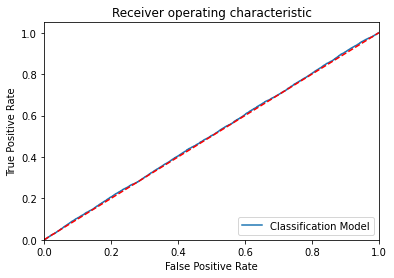

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[21868  1027]
 [ 5958 16650]]
Outcome values : 
 21868 1027 5958 16650
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.96      0.86     22895
           0       0.94      0.74      0.83     22608

    accuracy                           0.85     45503
   macro avg       0.86      0.85      0.84     45503
weighted avg       0.86      0.85      0.84     45503

Accuracy : 84.6 %
Precision : 78.6 %
Recall : 95.5 %
F1 Score : 0.862
Specificity or True Negative Rate : 73.6 %
Balanced Accuracy : 84.5 %
MCC : 0.709
roc_auc_score: 0.846


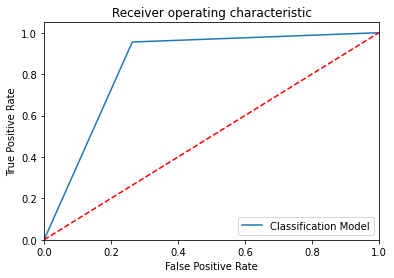

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[21626  1269]
 [  265 22343]]
Outcome values : 
 21626 1269 265 22343
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.94      0.97     22895
           0       0.95      0.99      0.97     22608

    accuracy                           0.97     45503
   macro avg       0.97      0.97      0.97     45503
weighted avg       0.97      0.97      0.97     45503

Accuracy : 96.6 %
Precision : 98.8 %
Recall : 94.5 %
F1 Score : 0.966
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 96.6 %
MCC : 0.934
roc_auc_score: 0.966


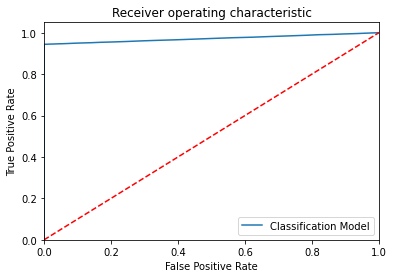

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[21619  1276]
 [  103 22505]]
Outcome values : 
 21619 1276 103 22505
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.94      0.97     22895
           0       0.95      1.00      0.97     22608

    accuracy                           0.97     45503
   macro avg       0.97      0.97      0.97     45503
weighted avg       0.97      0.97      0.97     45503

Accuracy : 97.0 %
Precision : 99.5 %
Recall : 94.4 %
F1 Score : 0.969
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 97.0 %
MCC : 0.941
roc_auc_score: 0.97


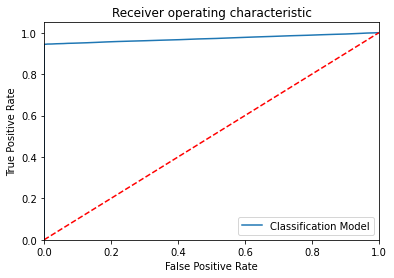

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[17612  5283]
 [10024 12584]]
Outcome values : 
 17612 5283 10024 12584
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.77      0.70     22895
           0       0.70      0.56      0.62     22608

    accuracy                           0.66     45503
   macro avg       0.67      0.66      0.66     45503
weighted avg       0.67      0.66      0.66     45503

Accuracy : 66.4 %
Precision : 63.7 %
Recall : 76.9 %
F1 Score : 0.697
Specificity or True Negative Rate : 55.7 %
Balanced Accuracy : 66.3 %
MCC : 0.334
roc_auc_score: 0.663


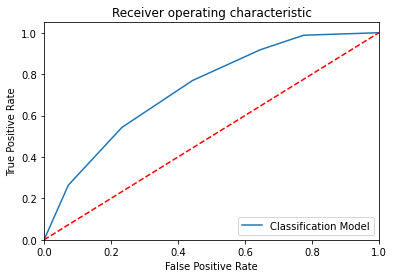

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[11848 11047]
 [10807 11801]]
Outcome values : 
 11848 11047 10807 11801
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.52      0.52     22895
           0       0.52      0.52      0.52     22608

    accuracy                           0.52     45503
   macro avg       0.52      0.52      0.52     45503
weighted avg       0.52      0.52      0.52     45503

Accuracy : 52.0 %
Precision : 52.3 %
Recall : 51.7 %
F1 Score : 0.52
Specificity or True Negative Rate : 52.2 %
Balanced Accuracy : 52.0 %
MCC : 0.039
roc_auc_score: 0.52


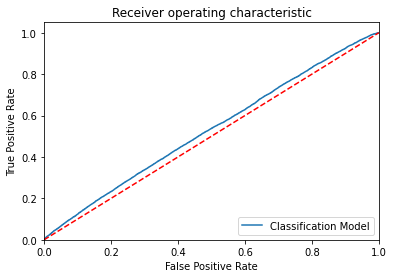

-----------------------------------------------------------------------------------------------------


In [35]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGB = GradientBoostingClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [36]:
# Results with comparing the all the algorithms 

CSResults.head(10)

#CSResults.to_csv("D://000 DataScience//01-Internship//CSResults_01.csv")

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.501,0.504,0.512,0.508,0.490,0.002,0.500953,0.501
1,DecisionTreeClassifier(),0.846,0.786,0.955,0.862,0.736,0.709,0.845804,0.845
2,"(DecisionTreeClassifier(max_features='auto', r...",0.966,0.988,0.945,0.966,0.988,0.934,0.966426,0.966
3,"(ExtraTreeClassifier(random_state=1226185003),...",0.970,0.995,0.944,0.969,0.995,0.941,0.969856,0.970
4,KNeighborsClassifier(),0.664,0.637,0.769,0.697,0.557,0.334,0.662934,0.663
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.520,0.523,0.517,0.520,0.522,0.039,0.519738,0.520
